# Index   

 
[Exploratory Data Analysis](#ExploratoryDataAnalysis)

[Analyzing customer purchasing habits](#A00001)

[Importing libraries](##Importing-libraries)

[Reading the data set](###Reading-the-data-set)

[Model Screening](#Model-Screening)

[Reading the data set](###Reading-the-data-set)

[Reading the data set](###Reading-the-data-set)

# Exploratory-Data-Analysis
<a id="A00001"></a>

### Importing libraries

In [23]:
#data exploration&manipulation
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from collections import Counter
import seaborn as sns
import pandas_profiling as pp
import joblib

import datetime as dt
import os
import matplotlib.pyplot as plt

#ML Models search and optimisation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
#from sklearn.model_selection import GridSearchCV
#from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, confusion_matrix
#from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

#Neural Networks
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K




%matplotlib inline

### Reading the data set

In [6]:
   
# Import space_X_train.csv
import pandas as pd
space_X_train = pd.read_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Hackathon_Talent_Squad\initial_docs\space_X_train.csv', index_col=0)

In [ ]:
###Exploring Data manually

In [7]:
space_X_train.head()


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [8]:
space_X_train.isnull().sum()

sensor_1    0
sensor_2    0
sensor_3    0
sensor_4    0
sensor_5    0
sensor_6    0
target      0
dtype: int64

In [9]:
space_X_train.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


Values of sensors are very similar (range from -0.433 to 6.700). There is no null values to be cleaned.

In [70]:
y = space_X_train.target

Text(0, 0.5, '# of instances')

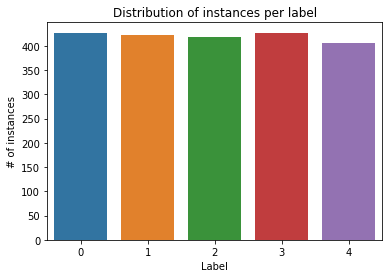

In [71]:
#Label distribution checking
counter = Counter(y)
dist_plot=sns.barplot(x=list(counter.keys()), y=list(counter.values()))
dist_plot.set_title('Distribution of instances per label')
dist_plot.set_xlabel('Label')
dist_plot.set_ylabel('# of instances')

In [72]:
ratio_labels= [x/len(y) for x in list(counter.values())]
ratio_labels

[0.19285714285714287,
 0.20333333333333334,
 0.20142857142857143,
 0.20285714285714285,
 0.19952380952380952]

Distribution of samples are very similiar each other, there is no minoritay/majotary class in the label column.

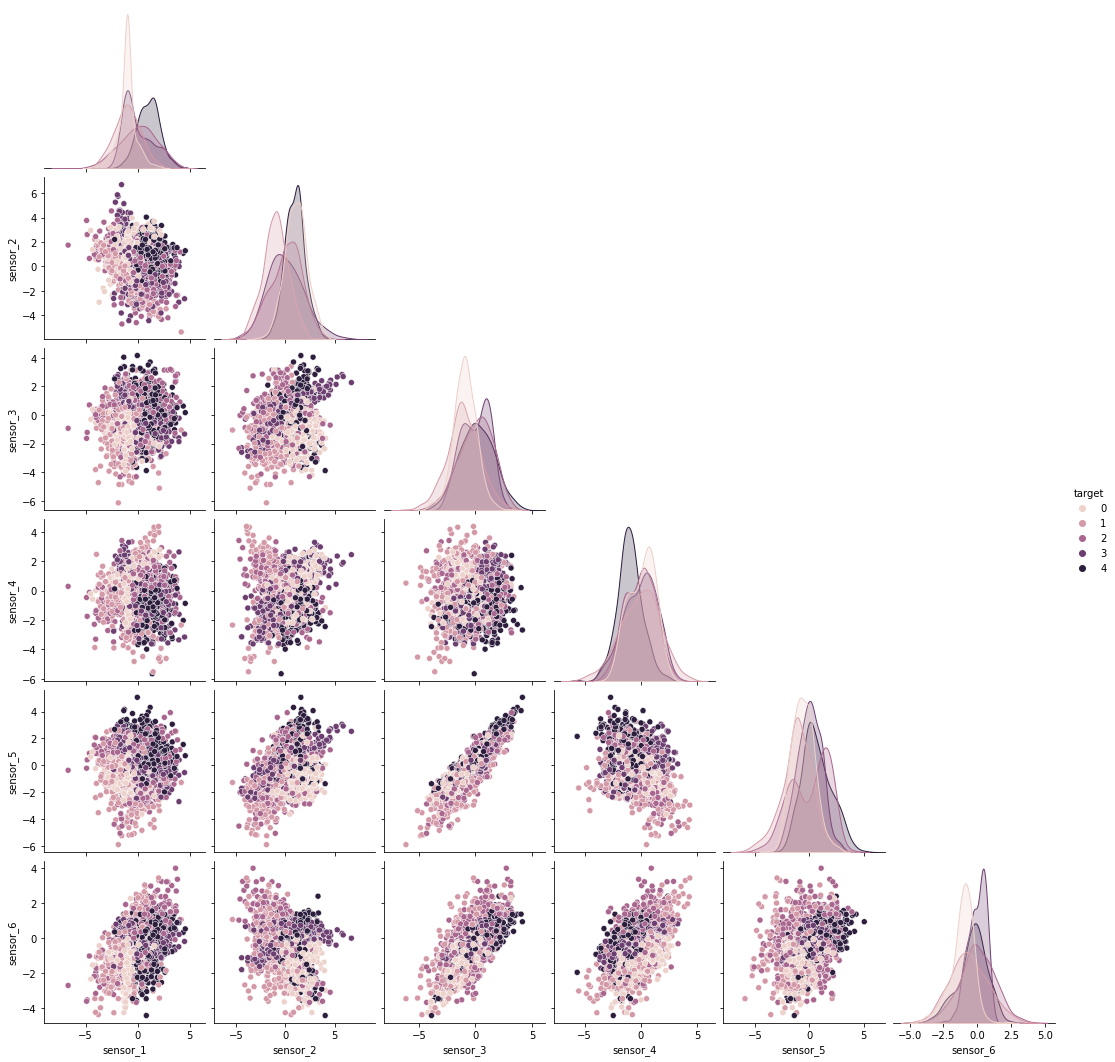

In [73]:
sns.pairplot(space_X_train, corner=True,hue='target')

<AxesSubplot:>

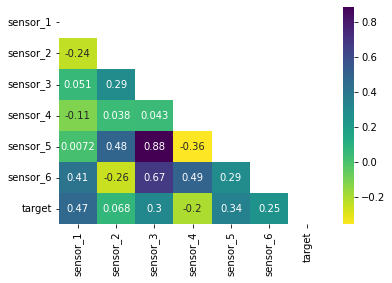

In [76]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(space_X_train.corr())

sns.heatmap(space_X_train.corr(), annot=True, cmap='viridis_r', mask=matrix)


From the previous graph it can be concluded that:
* Each class has a gaussian type distribution.
* The different labels form clusters for certain sensors.

There is no need to clean or engineer the Data set.

In [ ]:
space_X_train.columns

Index(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'target'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn import preprocessing

x = space_X_train.drop('target',axis=1).values #returns a numpy array
numerical_cols=['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6']

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
space_X_train_min_max_scaled = pd.DataFrame(x_scaled)

scaler = preprocessing.RobustScaler()
space_X_train_robust = scaler.fit_transform(x)
space_X_train_robust = pd.DataFrame(space_X_train_robust, columns =numerical_cols)

scaler = preprocessing.StandardScaler()
space_X_train_standard = scaler.fit_transform(x)
space_X_train_standard = pd.DataFrame(space_X_train_standard, columns =numerical_cols)


In [ ]:
space_X_train_min_max_scaled ['target'] = space_X_train['target']
space_X_train_robust ['target'] = space_X_train['target']
space_X_train_standard ['target'] = space_X_train['target']


In [ ]:
space_X_train_scaled['target'] = space_X_train['target']

## Neuronal Network Hyperparameters tunning with Optuna

In [38]:
import torch

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):
        self.labels=list(df.target)
        self.features = df.drop(columns=['target'], axis=1).values.tolist()

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_features(self, idx):
        return np.array(self.features[idx])

    def __getitem__(self, idx):
        batch_features = self.get_batch_features(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_features, batch_y

In [343]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 240}, 0.689068136145903)

In [351]:
scoring_f1(y_test,X_test,gsearch1)

0.7137069661061817

In [345]:
param_test2 = {'n_estimators':[240], 'criterion': ['gini', 'entropy', 'log_loss']}
gsearch2 = GridSearchCV(estimator = ExtraTreesClassifier(),
                        param_grid = param_test2, 
                        n_jobs = 4, 
                        cv = 5,
                        verbose = 4,
)

gsearch2.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:   16.7s remaining:    4.1s
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   18.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecate

In [346]:
gsearch2.best_params_, gsearch2.best_score_

({'criterion': 'entropy', 'n_estimators': 240}, 0.6879447934176766)

In [350]:
scoring_f1(y_test,X_test,gsearch2)

0.7126813595129133

In [352]:
param_test3 = {'n_estimators':[240], 'criterion': ['entropy']}
gsearch3 = GridSearchCV(estimator = ExtraTreesClassifier(),
                        param_grid = param_test3, 
                        n_jobs = 4, 
                        cv = 5,
                        verbose = 4,
)

gsearch3.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:   10.7s remaining:   16.1s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   13.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecate

## test_X prediction

To take advantage of all the dataset, the model with the best hyperparameters is fitted with the whole train data:

In [121]:
best_final_model = RandomForestClassifier(bootstrap = 'False', 
                                   max_depth = 2511, 
                                   max_features =  'auto',
                                   max_leaf_nodes = 9249,
                                   n_estimators = 610,
                                   n_jobs = 2                       
                                   )

In [125]:
X_final=space_X_train.copy()
X_final.drop('target', axis=1,inplace=True)
y_final = space_X_train.target

In [126]:
X_final

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490
...,...,...,...,...,...,...
2095,-0.947002,0.174969,-0.180249,0.118236,-0.143420,-0.359509
2096,-1.224148,0.029956,0.536684,0.888406,0.119460,0.378946
2097,-0.847593,1.538574,0.962409,1.966467,0.379934,0.737907
2098,1.472437,1.187695,1.015766,-1.103522,1.586722,0.182569


In [127]:
best_final_model.fit(X_final,y_final)

RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2511, max_features='auto',
                       max_leaf_nodes=9249, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=610, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Charge test_X dataset to be predicted. We check its statistically ressemblance to the training data set.:

In [117]:
test_x=pd.read_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Hackathon_Talent_Squad\initial_docs\space_X_test.csv',index_col=None)

test_x.isnull().sum()

Unnamed: 0    0
sensor_1      0
sensor_2      0
sensor_3      0
sensor_4      0
sensor_5      0
sensor_6      0
dtype: int64

In [118]:
test_x.shape

(900, 7)

In [119]:
test_x.drop('Unnamed: 0', axis=1, inplace=True)
test_x.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-0.170339,0.135481,-0.447035,-0.201708,-0.263349,-0.445490
std,1.485402,1.547202,1.394437,1.487102,1.450823,1.215000
min,-5.084203,-4.292548,-4.628992,-6.732089,-5.196997,-4.823971
25%,-1.098759,-0.934171,-1.460497,-1.163163,-1.182667,-1.152891
50%,-0.386297,0.341427,-0.464239,-0.177710,-0.233699,-0.410182
75%,0.881170,1.246296,0.626893,0.870332,0.679282,0.399597
max,4.636012,4.612113,3.299946,5.996929,3.917118,5.357953


In [128]:
x_test_pred = best_final_model.predict(test_x)
x_test_pred

array([1, 3, 2, 0, 3, 2, 4, 0, 2, 3, 1, 4, 1, 1, 4, 4, 4, 3, 2, 0, 1, 2,
       4, 0, 0, 3, 0, 2, 2, 4, 2, 2, 4, 3, 3, 1, 0, 4, 3, 0, 4, 2, 3, 2,
       2, 0, 0, 1, 2, 4, 4, 0, 2, 0, 4, 4, 1, 3, 3, 0, 3, 0, 3, 0, 4, 1,
       1, 0, 2, 3, 0, 1, 4, 0, 4, 0, 0, 1, 2, 3, 4, 3, 1, 3, 1, 1, 2, 3,
       1, 2, 2, 4, 1, 1, 0, 1, 4, 2, 0, 4, 0, 0, 0, 4, 2, 4, 4, 4, 1, 2,
       4, 1, 3, 3, 3, 2, 1, 4, 2, 2, 0, 4, 4, 3, 1, 2, 4, 1, 3, 2, 2, 1,
       4, 0, 0, 2, 3, 0, 0, 4, 0, 4, 3, 2, 1, 3, 4, 3, 4, 4, 1, 2, 1, 2,
       0, 4, 2, 4, 4, 2, 0, 2, 3, 1, 1, 4, 0, 3, 2, 0, 1, 2, 4, 4, 1, 2,
       3, 0, 3, 4, 2, 1, 0, 2, 2, 2, 0, 3, 4, 1, 1, 1, 2, 4, 0, 0, 4, 4,
       1, 2, 0, 2, 4, 3, 2, 2, 3, 1, 1, 3, 0, 0, 2, 1, 1, 3, 4, 2, 2, 1,
       2, 2, 2, 0, 3, 2, 0, 2, 2, 3, 0, 2, 4, 3, 2, 4, 0, 3, 3, 3, 0, 4,
       3, 0, 2, 0, 2, 1, 2, 0, 2, 3, 1, 3, 1, 1, 0, 3, 2, 4, 2, 1, 0, 2,
       2, 4, 2, 4, 1, 2, 1, 4, 2, 0, 3, 0, 1, 4, 2, 4, 1, 1, 2, 1, 1, 4,
       0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 4, 4, 1, 4, 0,

In [136]:
predictions_df=pd.DataFrame(x_test_pred,columns=['final_status'])
predictions_df

,final_status
0,1
1,3
2,2
3,0
4,3
...,...
895,3
896,4
897,0
898,3


In [137]:

predictions_df.predictions_df.to_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Hackathon_Talent_Squad\predictions.csv',index=False)

In [140]:
pip list > requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Neural Networks with Keras

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import seaborn as sns
# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K


In [27]:
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical


In [28]:
  
# Import space_X_train.csv
import pandas as pd
space_X_train = pd.read_csv(r'C:\Users\march\000 Treball Ju`yter 000\Hackathons\Hackathon_Talent_Squad\initial_docs\space_X_train.csv', index_col=0)

In [29]:
space_X_train.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [30]:
list(space_X_train.columns)

['sensor_1',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_5',
 'sensor_6',
 'target']

In [31]:
features = list(space_X_train.columns)
features.pop()

'target'

In [32]:
print (features)

['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6']


In [64]:
x = space_X_train.drop('target',axis=1).values #returns a numpy array
numerical_cols=['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6']

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
space_X_train_min_max_scaled = pd.DataFrame(x_scaled)

scaler = preprocessing.RobustScaler()
space_X_train_robust = scaler.fit_transform(x)
space_X_train_robust = pd.DataFrame(space_X_train_robust, columns =numerical_cols)

scaler = preprocessing.StandardScaler()
space_X_train_standard = scaler.fit_transform(x)
space_X_train_standard = pd.DataFrame(space_X_train_standard, columns =numerical_cols)

In [85]:
x = space_X_train.copy()
x.drop(["target"], 
            axis = 1,
            inplace=True
            )
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = space_X_train["target"]
y_cat = to_categorical(y) #it is required this encoding for NN

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cat, test_size=0.2, random_state=1,stratify=y)

In [87]:
y_cat

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [92]:
model = Sequential()
model.add(Dense(30, input_shape = (6,), activation = "relu"))
model.add(Dense(17, activation = "relu"))
model.add(Dropout(0.15))
model.add(Dense(5, activation = "softmax"))
model.compile(Adam(learning_rate = 0.01), "categorical_crossentropy", metrics = ["categorical_accuracy"])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 30)                210       
                                                                 
 dense_43 (Dense)            (None, 17)                527       
                                                                 
 dropout_18 (Dropout)        (None, 17)                0         
                                                                 
 dense_44 (Dense)            (None, 5)                 90        
                                                                 
Total params: 827
Trainable params: 827
Non-trainable params: 0
_________________________________________________________________


In [93]:
import keras
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


nn_model_fitting = model.fit(x_train, y_train, verbose=1, epochs=300, validation_split=0.2,  callbacks=[es_callback])

Epoch 1/300
42/42 [==============================] - 2s 16ms/step - loss: 1.2611 - categorical_accuracy: 0.4851 - val_loss: 1.0305 - val_categorical_accuracy: 0.5536
Epoch 2/300
42/42 [==============================] - 0s 6ms/step - loss: 0.9894 - categorical_accuracy: 0.6019 - val_loss: 0.9073 - val_categorical_accuracy: 0.6339
Epoch 3/300
42/42 [==============================] - 0s 5ms/step - loss: 0.8770 - categorical_accuracy: 0.6510 - val_loss: 0.8315 - val_categorical_accuracy: 0.6577
Epoch 4/300
42/42 [==============================] - 0s 5ms/step - loss: 0.8181 - categorical_accuracy: 0.6786 - val_loss: 0.8187 - val_categorical_accuracy: 0.6637
Epoch 5/300
42/42 [==============================] - 0s 5ms/step - loss: 0.7701 - categorical_accuracy: 0.6964 - val_loss: 0.7473 - val_categorical_accuracy: 0.7024
Epoch 6/300
42/42 [==============================] - 0s 5ms/step - loss: 0.7636 - categorical_accuracy: 0.6912 - val_loss: 0.7735 - val_categorical_accuracy: 0.6786
Epoch 7/3

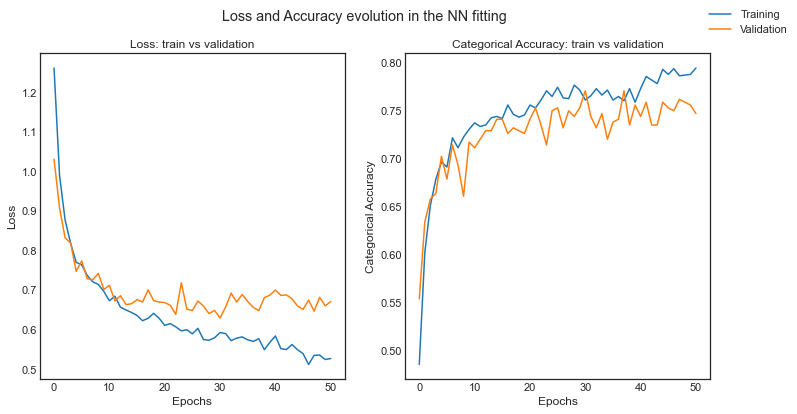

In [94]:
import matplotlib.style as style 
def plot_new_and_multiclassification_accuracy (nn_model_fitting):
    '''Funtion to plot loss and accuracy evolution along the model fitting of neuronal networks.
    
    Input: nn_model_fitting correspond to the fitting of the neuronal networks model sequential of Keras
    '''
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
 
    fig.suptitle('Loss and Accuracy evolution in the NN fitting')
 
    style.available
    palette = sns.color_palette("mako_r", 2)
    
    for y_axis in ['loss','categorical_accuracy']:
        val= 'val_'+ y_axis
        if y_axis =='loss':
            ax_def=axes[0]
            ylabel='Loss'
            title='Loss: train vs validation'
        elif y_axis =='categorical_accuracy':
            ax_def=axes[1]
            ylabel='Categorical Accuracy'
            title='Categorical Accuracy: train vs validation'
        sns.set_context("notebook")
        style.use('seaborn-white')    
        sns.lineplot(ax=ax_def, 
                    x=range(0,len(nn_model_fitting.history[y_axis])),
                    y=nn_model_fitting.history[y_axis], 
                    palette=palette
                    )
        plot_new = sns.lineplot(ax=ax_def, 
                            x=range(0,len(nn_model_fitting.history[y_axis])), 
                            y=nn_model_fitting.history[val], 
                            palette=palette 
                            )
        plot_new.set_xlabel('Epochs')
        plot_new.set_ylabel(ylabel)
        plot_new.set_title(title)
    fig.legend(labels=["Training","Validation"])

plot_new_and_multiclassification_accuracy (nn_model_fitting)
